<a href="https://colab.research.google.com/github/tripuragorla/CMPE-258-Assignment/blob/main/CMPE_258_Homework_6_Asssignment/CMPE_258_Homework_6_Asssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# a) MANDATORY:  Implement complete autograd framework in python and numpy  and mnist classifier using the autograd framework.

# Part 1: Introduction to Tensors

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self, data):
        self.data = np.array(data)
    
    def __add__(self, other):
        return Tensor(self.data + other.data)
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())
    
x = Tensor([1,2,3,4,5])
print(x)

y = x + x
print(y)

[1 2 3 4 5]
[ 2  4  6  8 10]


# Part 2: Introduction to Autograd

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self, data, creators=None, creation_op = None):
        self.data = np.array(data)
        self.creation_op = creation_op
        self.creators = creators
        self.grad = None
    
    def backward(self, grad):
        self.grad = grad
        
        if(self.creation_op == "add"):
            self.creators[0].backward(grad)
            self.creators[1].backward(grad)

    def __add__(self, other):
        return Tensor(self.data + other.data,  creators=[self,other], creation_op="add")
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())
    
x = Tensor([1,2,3,4,5])
y = Tensor([2,2,2,2,2])

z = x + y
z.backward(Tensor(np.array([1,1,1,1,1])))


In [ ]:
print(x.grad)
print(y.grad)
print(z.creators)
print(z.creation_op)

[1 1 1 1 1]
[1 1 1 1 1]
[array([1, 2, 3, 4, 5]), array([2, 2, 2, 2, 2])]
add


In [ ]:
a = Tensor([1,2,3,4,5])
b = Tensor([2,2,2,2,2])
c = Tensor([5,4,3,2,1])
d = Tensor([-1,-2,-3,-4,-5])

e = a + b
f = c + d
g = e + f

g.backward(Tensor(np.array([1,1,1,1,1])))

print(a.grad)

[1 1 1 1 1]


# Part 3: Tensors That Are Used Multiple Times

In [ ]:
a = Tensor([1,2,3,4,5])
b = Tensor([2,2,2,2,2])
c = Tensor([5,4,3,2,1])

d = a + b
e = b + c
f = d + e
f.backward(Tensor(np.array([1,1,1,1,1])))

b.grad.data == np.array([2,2,2,2,2])

array([False, False, False, False, False])

# Part 4: Upgrading Autograd to Support Multiple Tensors

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True        
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
            if(grad is None):
                grad = FloatTensor(np.ones_like(self.data))
            
            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
a = Tensor([1,2,3,4,5], autograd=True)
b = Tensor([2,2,2,2,2], autograd=True)
c = Tensor([5,4,3,2,1], autograd=True)

d = a + b
e = b + c
f = d + e

f.backward(Tensor(np.array([1,1,1,1,1])))

print(b.grad.data == np.array([2,2,2,2,2]))


[ True  True  True  True  True]


# Part 5: Add Support for Negation

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True        
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
            if(grad is None):
                grad = FloatTensor(np.ones_like(self.data))
            
            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1) 
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
a = Tensor([1,2,3,4,5], autograd=True)
b = Tensor([2,2,2,2,2], autograd=True)
c = Tensor([5,4,3,2,1], autograd=True)

d = a + (-b)
e = (-b) + c
f = d + e

f.backward(Tensor(np.array([1,1,1,1,1])))

print(b.grad.data == np.array([-2,-2,-2,-2,-2]))


[ True  True  True  True  True]


# Part 6: Add Support for Additional Functions

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True 
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
 
            if(grad is None):
                grad = Tensor(np.ones_like(self.data))

            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "sub"):
                    self.creators[0].backward(Tensor(self.grad.data), self)
                    self.creators[1].backward(Tensor(self.grad.__neg__().data), self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1]
                    self.creators[0].backward(new , self)
                    new = self.grad * self.creators[0]
                    self.creators[1].backward(new, self)                    
                    
                if(self.creation_op == "mm"):
                    c0 = self.creators[0]
                    c1 = self.creators[1]
                    new = self.grad.mm(c1.transpose())
                    c0.backward(new)
                    new = self.grad.transpose().mm(c0).transpose()
                    c1.backward(new)
                    
                if(self.creation_op == "transpose"):
                    self.creators[0].backward(self.grad.transpose())

                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.expand(dim,
                                                               self.creators[0].data.shape[dim]))

                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.sum(dim))
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1)
    
    def __sub__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data - other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="sub")
        return Tensor(self.data - other.data)
    
    def __mul__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data * other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="mul")
        return Tensor(self.data * other.data)    

    def sum(self, dim):
        if(self.autograd):
            return Tensor(self.data.sum(dim),
                          autograd=True,
                          creators=[self],
                          creation_op="sum_"+str(dim))
        return Tensor(self.data.sum(dim))
    
    def expand(self, dim,copies):

        trans_cmd = list(range(0,len(self.data.shape)))
        trans_cmd.insert(dim,len(self.data.shape))
        new_data = self.data.repeat(copies).reshape(list(self.data.shape) + [copies]).transpose(trans_cmd)
        
        if(self.autograd):
            return Tensor(new_data,
                          autograd=True,
                          creators=[self],
                          creation_op="expand_"+str(dim))
        return Tensor(new_data)
    
    def transpose(self):
        if(self.autograd):
            return Tensor(self.data.transpose(),
                          autograd=True,
                          creators=[self],
                          creation_op="transpose")
        
        return Tensor(self.data.transpose())
    
    def mm(self, x):
        if(self.autograd):
            return Tensor(self.data.dot(x.data),
                          autograd=True,
                          creators=[self,x],
                          creation_op="mm")
        return Tensor(self.data.dot(x.data))
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
a = Tensor([1,2,3,4,5], autograd=True)
b = Tensor([2,2,2,2,2], autograd=True)
c = Tensor([5,4,3,2,1], autograd=True)

d = a + b
e = b + c
f = d + e

f.backward(Tensor(np.array([1,1,1,1,1])))

print(b.grad.data == np.array([2,2,2,2,2]))


[ True  True  True  True  True]


# A few Notes on Sum and Expand

In [ ]:
x = Tensor(np.array([[1,2,3],
                     [4,5,6]]))

In [ ]:
x.sum(0)

array([5, 7, 9])

In [ ]:
x.sum(1)

array([ 6, 15])

In [ ]:
x.expand(dim=2, copies=4)

array([[[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]],

       [[4, 4, 4, 4],
        [5, 5, 5, 5],
        [6, 6, 6, 6]]])

# Part 7: Use Autograd to Train a Neural Network
Previously we would train a model like this

In [ ]:
import numpy
np.random.seed(0)

data = np.array([[0,0],[0,1],[1,0],[1,1]])
target = np.array([[0],[1],[0],[1]])

weights_0_1 = np.random.rand(2,3)
weights_1_2 = np.random.rand(3,1)

for i in range(10):
    
    # Predict
    layer_1 = data.dot(weights_0_1)
    layer_2 = layer_1.dot(weights_1_2)
    
    # Compare
    diff = (layer_2 - target)
    sqdiff = (diff * diff)
    loss = sqdiff.sum(0) # mean squared error loss

    # Learn: this is the backpropagation piece
    layer_1_grad = diff.dot(weights_1_2.transpose())
    weight_1_2_update = layer_1.transpose().dot(diff)
    weight_0_1_update = data.transpose().dot(layer_1_grad)
    
    weights_1_2 -= weight_1_2_update * 0.1
    weights_0_1 -= weight_0_1_update * 0.1
    print(loss[0])

5.066439994622396
0.4959907791902341
0.4180671892167177
0.35298133007809646
0.2972549636567376
0.24923260381633278
0.20785392075862477
0.17231260916265181
0.14193744536652994
0.11613979792168387


In [ ]:
import numpy
np.random.seed(0)

data = Tensor(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

w = list()
w.append(Tensor(np.random.rand(2,3), autograd=True))
w.append(Tensor(np.random.rand(3,1), autograd=True))

for i in range(10):

    # Predict
    pred = data.mm(w[0]).mm(w[1])
    
    # Compare
    loss = ((pred - target)*(pred - target)).sum(0)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))

    for w_ in w:
        w_.data -= w_.grad.data * 0.1
        w_.grad.data *= 0

    print(loss)

[0.58128304]
[0.48988149]
[0.41375111]
[0.34489412]
[0.28210124]
[0.2254484]
[0.17538853]
[0.1324231]
[0.09682769]
[0.06849361]


# Part 8: Adding Automatic Optimization

In [ ]:
class SGD(object):
    
    def __init__(self, parameters, alpha=0.1):
        self.parameters = parameters
        self.alpha = alpha
    
    def zero(self):
        for p in self.parameters:
            p.grad.data *= 0
        
    def step(self, zero=True):
        
        for p in self.parameters:
            
            p.data -= p.grad.data * self.alpha
            
            if(zero):
                p.grad.data *= 0

In [ ]:
import numpy
np.random.seed(0)

data = Tensor(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

w = list()
w.append(Tensor(np.random.rand(2,3), autograd=True))
w.append(Tensor(np.random.rand(3,1), autograd=True))

optim = SGD(parameters=w, alpha=0.1)

for i in range(10):

    # Predict
    pred = data.mm(w[0]).mm(w[1])
    
    # Compare
    loss = ((pred - target)*(pred - target)).sum(0)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()

    print(loss)

[0.58128304]
[0.48988149]
[0.41375111]
[0.34489412]
[0.28210124]
[0.2254484]
[0.17538853]
[0.1324231]
[0.09682769]
[0.06849361]


# Part 9: Adding Support for Layer Types

In [ ]:
class Layer(object):
    
    def __init__(self):
        self.parameters = list()
        
    def get_parameters(self):
        return self.parameters


class Linear(Layer):

    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        W = np.random.randn(n_inputs, n_outputs) * np.sqrt(2.0/(n_inputs))
        self.weight = Tensor(W, autograd=True)
        self.bias = Tensor(np.zeros(n_outputs), autograd=True)
        
        self.parameters.append(self.weight)
        self.parameters.append(self.bias)

    def forward(self, input):
        return input.mm(self.weight)+self.bias.expand(0,len(input.data))

# Part 10: Layers Which Contain Layers

In [ ]:
class Sequential(Layer):
    
    def __init__(self, layers=list()):
        super().__init__()
        
        self.layers = layers
    
    def add(self, layer):
        self.layers.append(layer)
        
    def forward(self, input):
        for layer in self.layers:
            input = layer.forward(input)
        return input
    
    def get_parameters(self):
        params = list()
        for l in self.layers:
            params += l.get_parameters()
        return params
    
import numpy
np.random.seed(0)

data = Tensor(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

model = Sequential([Linear(2,3), Linear(3,1)])

optim = SGD(parameters=model.get_parameters(), alpha=0.05)

for i in range(10):
    
    # Predict
    pred = model.forward(data)
    
    # Compare
    loss = ((pred - target)*(pred - target)).sum(0)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()
    print(loss)

[2.33428272]
[0.06743796]
[0.0521849]
[0.04079507]
[0.03184365]
[0.02479336]
[0.01925443]
[0.01491699]
[0.01153118]
[0.00889602]


# Part 11: Loss Function Layers

In [ ]:
class MSELoss(Layer):
    
    def __init__(self):
        super().__init__()
    
    def forward(self, pred, target):
        return ((pred - target)*(pred - target)).sum(0)
    
import numpy
np.random.seed(0)

data = Tensor(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

model = Sequential([Linear(2,3), Linear(3,1)])
criterion = MSELoss()

optim = SGD(parameters=model.get_parameters(), alpha=0.05)

for i in range(10):
    
    # Predict
    pred = model.forward(data)
    
    # Compare
    loss = criterion.forward(pred, target)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()
    print(loss)

[2.33428272]
[0.06743796]
[0.0521849]
[0.04079507]
[0.03184365]
[0.02479336]
[0.01925443]
[0.01491699]
[0.01153118]
[0.00889602]


# Part 12: Non-linearity Layers

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True 
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
 
            if(grad is None):
                grad = Tensor(np.ones_like(self.data))

            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "sub"):
                    self.creators[0].backward(Tensor(self.grad.data), self)
                    self.creators[1].backward(Tensor(self.grad.__neg__().data), self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1]
                    self.creators[0].backward(new , self)
                    new = self.grad * self.creators[0]
                    self.creators[1].backward(new, self)                    
                    
                if(self.creation_op == "mm"):
                    c0 = self.creators[0]
                    c1 = self.creators[1]
                    new = self.grad.mm(c1.transpose())
                    c0.backward(new)
                    new = self.grad.transpose().mm(c0).transpose()
                    c1.backward(new)
                    
                if(self.creation_op == "transpose"):
                    self.creators[0].backward(self.grad.transpose())

                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.expand(dim,
                                                               self.creators[0].data.shape[dim]))

                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.sum(dim))
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
                if(self.creation_op == "sigmoid"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (self * (ones - self)))
                
                if(self.creation_op == "tanh"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (ones - (self * self)))
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1)
    
    def __sub__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data - other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="sub")
        return Tensor(self.data - other.data)
    
    def __mul__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data * other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="mul")
        return Tensor(self.data * other.data)    

    def sum(self, dim):
        if(self.autograd):
            return Tensor(self.data.sum(dim),
                          autograd=True,
                          creators=[self],
                          creation_op="sum_"+str(dim))
        return Tensor(self.data.sum(dim))
    
    def expand(self, dim,copies):

        trans_cmd = list(range(0,len(self.data.shape)))
        trans_cmd.insert(dim,len(self.data.shape))
        new_data = self.data.repeat(copies).reshape(list(self.data.shape) + [copies]).transpose(trans_cmd)
        
        if(self.autograd):
            return Tensor(new_data,
                          autograd=True,
                          creators=[self],
                          creation_op="expand_"+str(dim))
        return Tensor(new_data)
    
    def transpose(self):
        if(self.autograd):
            return Tensor(self.data.transpose(),
                          autograd=True,
                          creators=[self],
                          creation_op="transpose")
        
        return Tensor(self.data.transpose())
    
    def mm(self, x):
        if(self.autograd):
            return Tensor(self.data.dot(x.data),
                          autograd=True,
                          creators=[self,x],
                          creation_op="mm")
        return Tensor(self.data.dot(x.data))
    
    def sigmoid(self):
        if(self.autograd):
            return Tensor(1 / (1 + np.exp(-self.data)),
                          autograd=True,
                          creators=[self],
                          creation_op="sigmoid")
        return Tensor(1 / (1 + np.exp(-self.data)))

    def tanh(self):
        if(self.autograd):
            return Tensor(np.tanh(self.data),
                          autograd=True,
                          creators=[self],
                          creation_op="tanh")
        return Tensor(np.tanh(self.data))
        
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
class Tanh(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.tanh()
    
class Sigmoid(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.sigmoid()

In [ ]:
import numpy
np.random.seed(0)

data = Tensor(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

model = Sequential([Linear(2,3), Tanh(), Linear(3,1), Sigmoid()])
criterion = MSELoss()

optim = SGD(parameters=model.get_parameters(), alpha=1)

for i in range(10):
    
    # Predict
    pred = model.forward(data)
    
    # Compare
    loss = criterion.forward(pred, target)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()
    print(loss)

[1.06372865]
[0.75148144]
[0.57384259]
[0.39574294]
[0.2482279]
[0.15515294]
[0.10423398]
[0.07571169]
[0.05837623]
[0.04700013]


# Part 13: The Embedding Layer

In [ ]:
class Embedding(Layer):
    
    def __init__(self, vocab_size, dim):
        super().__init__()
        
        self.vocab_size = vocab_size
        self.dim = dim
        
        # this random initialiation style is just a convention from word2vec
        self.weight = (np.random.rand(vocab_size, dim) - 0.5) / dim

# Part 14: Add Indexing to Autograd

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True 
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
 
            if(grad is None):
                grad = Tensor(np.ones_like(self.data))

            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "sub"):
                    self.creators[0].backward(Tensor(self.grad.data), self)
                    self.creators[1].backward(Tensor(self.grad.__neg__().data), self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1]
                    self.creators[0].backward(new , self)
                    new = self.grad * self.creators[0]
                    self.creators[1].backward(new, self)                    
                    
                if(self.creation_op == "mm"):
                    c0 = self.creators[0]
                    c1 = self.creators[1]
                    new = self.grad.mm(c1.transpose())
                    c0.backward(new)
                    new = self.grad.transpose().mm(c0).transpose()
                    c1.backward(new)
                    
                if(self.creation_op == "transpose"):
                    self.creators[0].backward(self.grad.transpose())

                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.expand(dim,
                                                               self.creators[0].data.shape[dim]))

                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.sum(dim))
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
                if(self.creation_op == "sigmoid"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (self * (ones - self)))
                
                if(self.creation_op == "tanh"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (ones - (self * self)))
                
                if(self.creation_op == "index_select"):
                    new_grad = np.zeros_like(self.creators[0].data)
                    indices_ = self.index_select_indices.data.flatten()
                    grad_ = grad.data.reshape(len(indices_), -1)
                    for i in range(len(indices_)):
                        new_grad[indices_[i]] += grad_[i]
                    self.creators[0].backward(Tensor(new_grad))
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1)
    
    def __sub__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data - other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="sub")
        return Tensor(self.data - other.data)
    
    def __mul__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data * other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="mul")
        return Tensor(self.data * other.data)    

    def sum(self, dim):
        if(self.autograd):
            return Tensor(self.data.sum(dim),
                          autograd=True,
                          creators=[self],
                          creation_op="sum_"+str(dim))
        return Tensor(self.data.sum(dim))
    
    def expand(self, dim,copies):

        trans_cmd = list(range(0,len(self.data.shape)))
        trans_cmd.insert(dim,len(self.data.shape))
        new_data = self.data.repeat(copies).reshape(list(self.data.shape) + [copies]).transpose(trans_cmd)
        
        if(self.autograd):
            return Tensor(new_data,
                          autograd=True,
                          creators=[self],
                          creation_op="expand_"+str(dim))
        return Tensor(new_data)
    
    def transpose(self):
        if(self.autograd):
            return Tensor(self.data.transpose(),
                          autograd=True,
                          creators=[self],
                          creation_op="transpose")
        
        return Tensor(self.data.transpose())
    
    def mm(self, x):
        if(self.autograd):
            return Tensor(self.data.dot(x.data),
                          autograd=True,
                          creators=[self,x],
                          creation_op="mm")
        return Tensor(self.data.dot(x.data))
    
    def sigmoid(self):
        if(self.autograd):
            return Tensor(1 / (1 + np.exp(-self.data)),
                          autograd=True,
                          creators=[self],
                          creation_op="sigmoid")
        return Tensor(1 / (1 + np.exp(-self.data)))

    def tanh(self):
        if(self.autograd):
            return Tensor(np.tanh(self.data),
                          autograd=True,
                          creators=[self],
                          creation_op="tanh")
        return Tensor(np.tanh(self.data))
    
    def index_select(self, indices):

        if(self.autograd):
            new = Tensor(self.data[indices.data],
                         autograd=True,
                         creators=[self],
                         creation_op="index_select")
            new.index_select_indices = indices
            return new
        return Tensor(self.data[indices.data])
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
class Tanh(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.tanh()
    
class Sigmoid(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.sigmoid()

In [ ]:
x = Tensor(np.eye(5), autograd=True)
x.index_select(Tensor([[1,2,3],[2,3,4]])).backward()
print(x.grad)

[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1.]]


# Part 15: The Embedding Layer (revisited)

In [ ]:
class Embedding(Layer):
    
    def __init__(self, vocab_size, dim):
        super().__init__()
        
        self.vocab_size = vocab_size
        self.dim = dim
        
        # this random initialiation style is just a convention from word2vec
        self.weight = Tensor((np.random.rand(vocab_size, dim) - 0.5) / dim, autograd=True)
        
        self.parameters.append(self.weight)
    
    def forward(self, input):
        return self.weight.index_select(input)

In [ ]:

import numpy
np.random.seed(0)

data = Tensor(np.array([1,2,1,2]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

embed = Embedding(5,3)
model = Sequential([embed, Tanh(), Linear(3,1), Sigmoid()])
criterion = MSELoss()

optim = SGD(parameters=model.get_parameters(), alpha=0.5)

for i in range(10):
    
    # Predict
    pred = model.forward(data)
    
    # Compare
    loss = criterion.forward(pred, target)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()
    print(loss)

[0.98874126]
[0.6658868]
[0.45639889]
[0.31608168]
[0.2260925]
[0.16877423]
[0.13120515]
[0.10555487]
[0.08731868]
[0.07387834]


# Part 16: The Cross Entropy Layer

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True 
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
 
            if(grad is None):
                grad = Tensor(np.ones_like(self.data))

            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "sub"):
                    self.creators[0].backward(Tensor(self.grad.data), self)
                    self.creators[1].backward(Tensor(self.grad.__neg__().data), self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1]
                    self.creators[0].backward(new , self)
                    new = self.grad * self.creators[0]
                    self.creators[1].backward(new, self)                    
                    
                if(self.creation_op == "mm"):
                    c0 = self.creators[0]
                    c1 = self.creators[1]
                    new = self.grad.mm(c1.transpose())
                    c0.backward(new)
                    new = self.grad.transpose().mm(c0).transpose()
                    c1.backward(new)
                    
                if(self.creation_op == "transpose"):
                    self.creators[0].backward(self.grad.transpose())

                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.expand(dim,
                                                               self.creators[0].data.shape[dim]))

                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.sum(dim))
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
                if(self.creation_op == "sigmoid"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (self * (ones - self)))
                
                if(self.creation_op == "tanh"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (ones - (self * self)))
                
                if(self.creation_op == "index_select"):
                    new_grad = np.zeros_like(self.creators[0].data)
                    indices_ = self.index_select_indices.data.flatten()
                    grad_ = grad.data.reshape(len(indices_), -1)
                    for i in range(len(indices_)):
                        new_grad[indices_[i]] += grad_[i]
                    self.creators[0].backward(Tensor(new_grad))
                    
                if(self.creation_op == "cross_entropy"):
                    dx = self.softmax_output - self.target_dist
                    self.creators[0].backward(Tensor(dx))
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1)
    
    def __sub__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data - other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="sub")
        return Tensor(self.data - other.data)
    
    def __mul__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data * other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="mul")
        return Tensor(self.data * other.data)    

    def sum(self, dim):
        if(self.autograd):
            return Tensor(self.data.sum(dim),
                          autograd=True,
                          creators=[self],
                          creation_op="sum_"+str(dim))
        return Tensor(self.data.sum(dim))
    
    def expand(self, dim,copies):

        trans_cmd = list(range(0,len(self.data.shape)))
        trans_cmd.insert(dim,len(self.data.shape))
        new_data = self.data.repeat(copies).reshape(list(self.data.shape) + [copies]).transpose(trans_cmd)
        
        if(self.autograd):
            return Tensor(new_data,
                          autograd=True,
                          creators=[self],
                          creation_op="expand_"+str(dim))
        return Tensor(new_data)
    
    def transpose(self):
        if(self.autograd):
            return Tensor(self.data.transpose(),
                          autograd=True,
                          creators=[self],
                          creation_op="transpose")
        
        return Tensor(self.data.transpose())
    
    def mm(self, x):
        if(self.autograd):
            return Tensor(self.data.dot(x.data),
                          autograd=True,
                          creators=[self,x],
                          creation_op="mm")
        return Tensor(self.data.dot(x.data))
    
    def sigmoid(self):
        if(self.autograd):
            return Tensor(1 / (1 + np.exp(-self.data)),
                          autograd=True,
                          creators=[self],
                          creation_op="sigmoid")
        return Tensor(1 / (1 + np.exp(-self.data)))

    def tanh(self):
        if(self.autograd):
            return Tensor(np.tanh(self.data),
                          autograd=True,
                          creators=[self],
                          creation_op="tanh")
        return Tensor(np.tanh(self.data))
    
    def index_select(self, indices):

        if(self.autograd):
            new = Tensor(self.data[indices.data],
                         autograd=True,
                         creators=[self],
                         creation_op="index_select")
            new.index_select_indices = indices
            return new
        return Tensor(self.data[indices.data])
    
    def cross_entropy(self, target_indices):

        temp = np.exp(self.data)
        softmax_output = temp / np.sum(temp,
                                       axis=len(self.data.shape)-1,
                                       keepdims=True)
        
        t = target_indices.data.flatten()
        p = softmax_output.reshape(len(t),-1)
        target_dist = np.eye(p.shape[1])[t]
        loss = -(np.log(p) * (target_dist)).sum(1).mean()
    
        if(self.autograd):
            out = Tensor(loss,
                         autograd=True,
                         creators=[self],
                         creation_op="cross_entropy")
            out.softmax_output = softmax_output
            out.target_dist = target_dist
            return out

        return Tensor(loss)
        
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
class Tanh(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.tanh()
    
class Sigmoid(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.sigmoid()


In [ ]:
class CrossEntropyLoss(object):
    
    def __init__(self):
        super().__init__()
    
    def forward(self, input, target):
        return input.cross_entropy(target)

In [ ]:
import numpy
np.random.seed(0)

# data indices
data = Tensor(np.array([1,2,1,2]), autograd=True)

# target indices
target = Tensor(np.array([0,1,0,1]), autograd=True)

model = Sequential([Embedding(3,3), Tanh(), Linear(3,4)])
criterion = CrossEntropyLoss()

optim = SGD(parameters=model.get_parameters(), alpha=0.1)

for i in range(10):
    
    # Predict
    pred = model.forward(data)
    
    # Compare
    loss = criterion.forward(pred, target)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()
    print(loss)

1.3885032434928422
0.9558181509266036
0.6823083585795604
0.509525996749312
0.39574491472895856
0.31752527285348275
0.2617222861964216
0.22061283923954234
0.18946427334830074
0.16527389263866668


In [ ]:
class RNNCell(Layer):
    
    def __init__(self, n_inputs, n_hidden, n_output, activation='sigmoid'):
        super().__init__()

        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_output = n_output
        
        if(activation == 'sigmoid'):
            self.activation = Sigmoid()
        elif(activation == 'tanh'):
            self.activation == Tanh()
        else:
            raise Exception("Non-linearity not found")

        self.w_ih = Linear(n_inputs, n_hidden)
        self.w_hh = Linear(n_hidden, n_hidden)
        self.w_ho = Linear(n_hidden, n_output)
        
        self.parameters += self.w_ih.get_parameters()
        self.parameters += self.w_hh.get_parameters()
        self.parameters += self.w_ho.get_parameters()        
    
    def forward(self, input, hidden):
        from_prev_hidden = self.w_hh.forward(hidden)
        combined = self.w_ih.forward(input) + from_prev_hidden
        new_hidden = self.activation.forward(combined)
        output = self.w_ho.forward(new_hidden)
        return output, new_hidden
    
    def init_hidden(self, batch_size=1):
        return Tensor(np.zeros((batch_size,self.n_hidden)), autograd=True)

# b) MANDATORY : Build an CNN based image classifier 

(at least 3 - 5 categories) from a custom data set you acquire (either from images.google.com or other places

In [2]:
import os
import zipfile

In [3]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB4
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls '/content/drive/MyDrive/CMPE258-HW6/'

seg_pred  seg_test  seg_train


In [6]:
TRAIN_DATA = '/content/drive/MyDrive/CMPE258-HW6/seg_train/seg_train/'
TEST_DATA = '/content/drive/MyDrive/CMPE258-HW6//seg_test/seg_test/'
img_height = 128
img_width = 128
epochs = 10
batch_size = 32


#model
#image_size = (180, 180)
#batch_size = 32
img_height = 180
img_width = 180
train_ds = '/content/drive/MyDrive/CMPE258-HW6/seg_train/seg_train/'
val_ds = '/content/drive/MyDrive/CMPE258-HW6//seg_test/seg_test/'

In [7]:
categories = glob(TRAIN_DATA+'*')
categories
for cat in categories:
    files = glob(cat+'/*')
    print(cat.split('/')[-1], len(files))

street 2382
forest 2271
buildings 2191
glacier 2404
mountain 2512
sea 2274


street
forest
buildings
glacier
mountain
sea


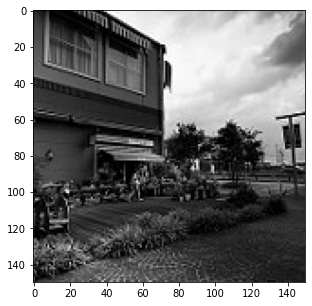

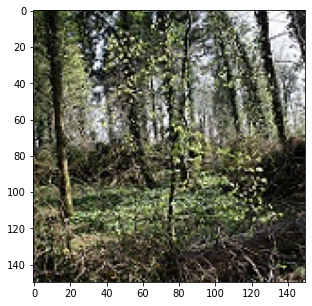

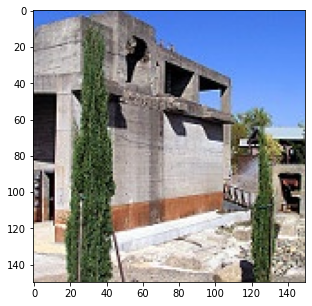

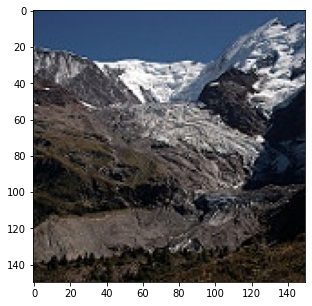

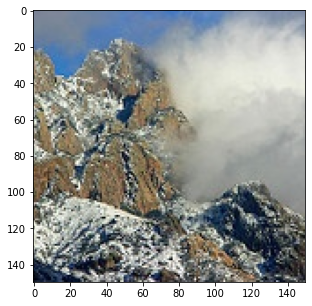

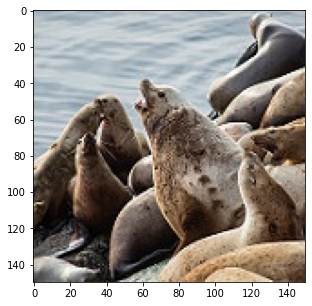

In [8]:
categories = glob(TRAIN_DATA+'*')
categories
for cat in categories:
    files = glob(cat+'/*')
    cat_name = cat.split('/')[-1]
    file_loc = files[0]
    img = cv2.imread(file_loc)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (5,5))
    print(cat_name)
    plt.imshow(img)

In [9]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/CMPE258-HW6/seg_train/seg_train/',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/CMPE258-HW6/seg_train/seg_train/',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


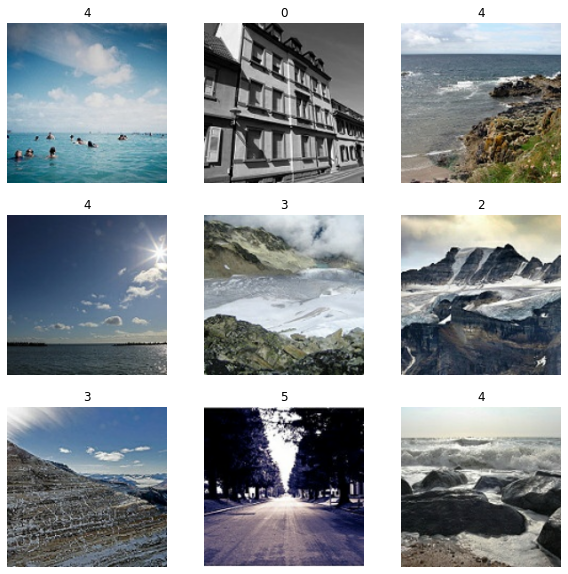

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [11]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

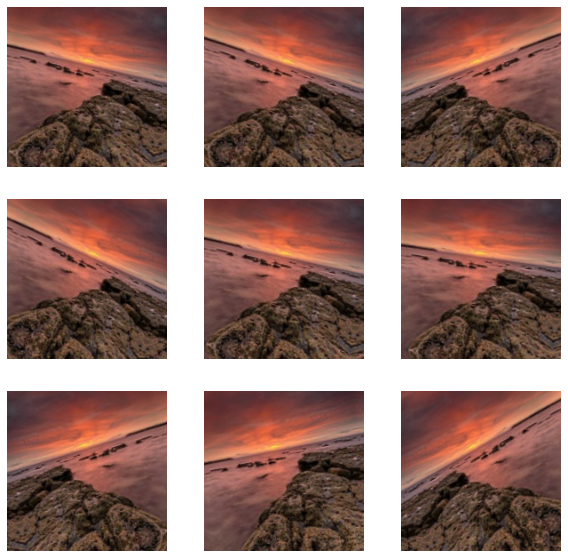

In [12]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [13]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [14]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

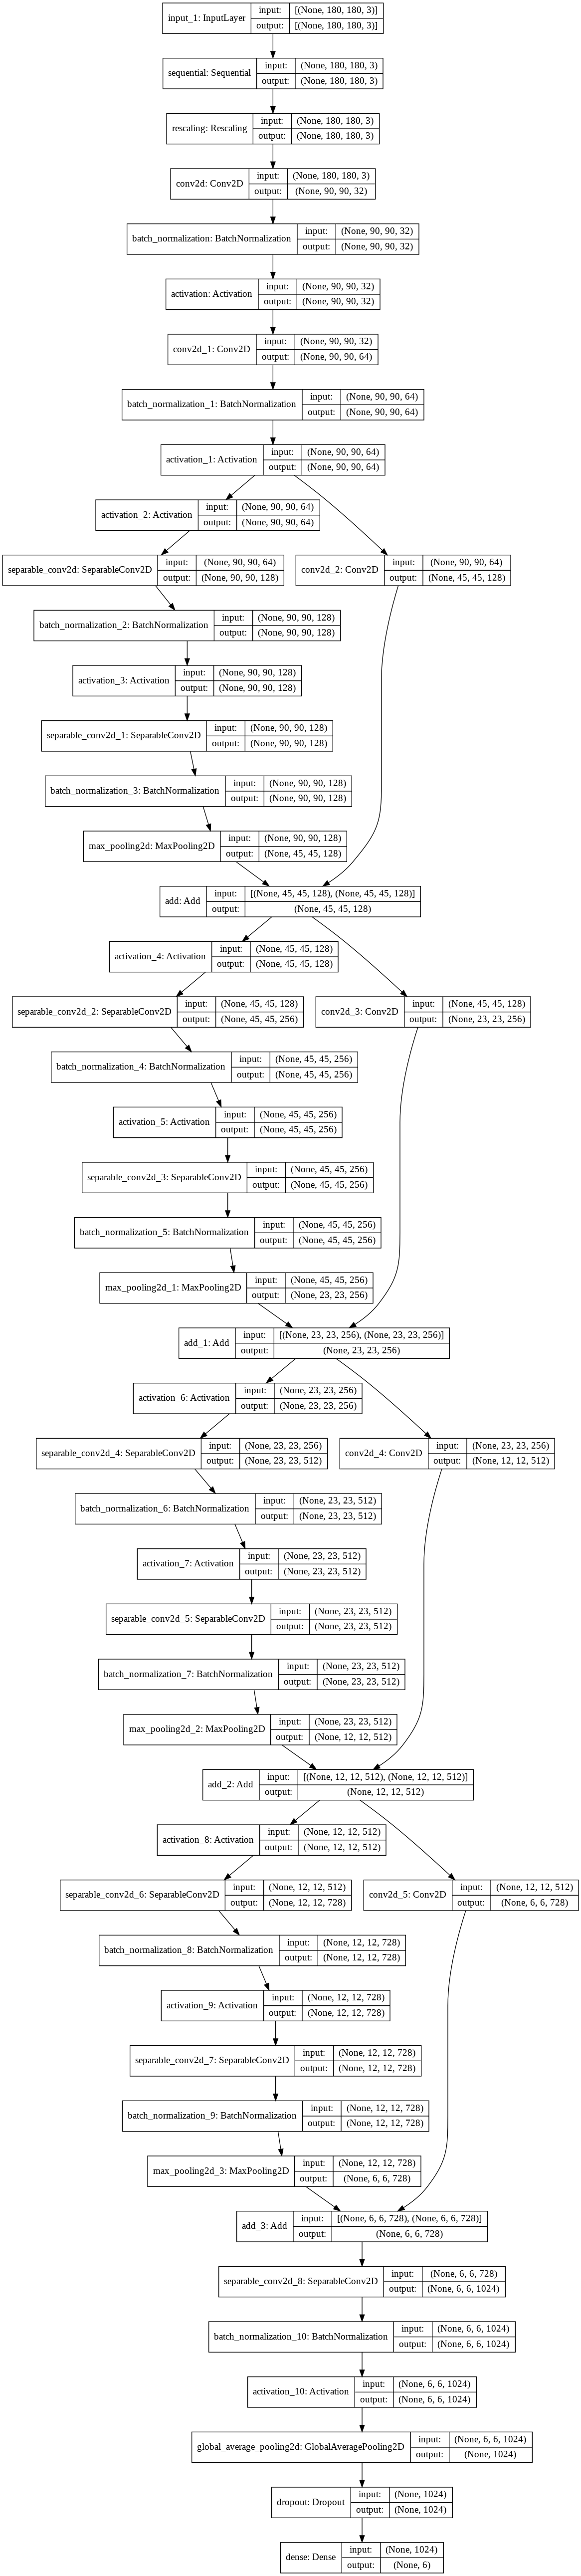

In [15]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 6:
        activation = "relu"
        units = num_classes
    else:
        activation = "sigmoid"
        units = 1

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=6)
keras.utils.plot_model(model, show_shapes=True)

In [17]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/50
351/351 [==============================] - 3232s 9s/step - loss: 1.1729 - accuracy: 0.5539 - val_loss: 3.3433 - val_accuracy: 0.1611
Epoch 2/50
351/351 [==============================] - 91s 259ms/step - loss: 0.7698 - accuracy: 0.7158 - val_loss: 1.0036 - val_accuracy: 0.7028
Epoch 3/50
351/351 [==============================] - 95s 268ms/step - loss: 0.6531 - accuracy: 0.7645 - val_loss: 1.3920 - val_accuracy: 0.5980
Epoch 4/50
351/351 [==============================] - 94s 267ms/step - loss: 0.5839 - accuracy: 0.7953 - val_loss: 1.3653 - val_accuracy: 0.5959
Epoch 5/50
351/351 [==============================] - 94s 267ms/step - loss: 0.5330 - accuracy: 0.8145 - val_loss: 0.9222 - val_accuracy: 0.7128
Epoch 6/50
351/351 [==============================] - 94s 268ms/step - loss: 0.5205 - accuracy: 0.8132 - val_loss: 0.5177 - val_accuracy: 0.8261
Epoch 7/50
351/351 [==============================] - 95s 269ms/step - loss: 0.4879 - accuracy: 0.8291 - val_loss: 0.5455 - val_acc

In [16]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/CMPE258-HW6/seg_pred/seg_pred/73.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(score)


[0.         0.00059726 0.00013369 0.00098279 0.         0.        ]


sea


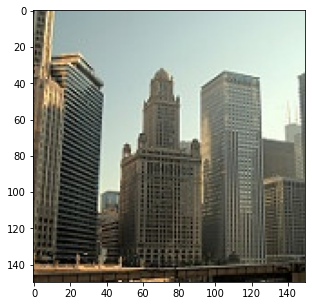

In [17]:
img = cv2.imread("/content/drive/MyDrive/CMPE258-HW6/seg_pred/seg_pred/73.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (5,5))
print(cat_name)
plt.imshow(img)

extra credits - use pretrained model

https://www.kaggle.com/shrijeethsuresh/image-classification-resnet-91-5-accuracy

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((180,180,3)),
    tf.keras.applications.ResNet50V2(include_top=False,weights='imagenet',input_shape=(180,180,3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax'),
])
print(model.summary())

94674944/94668760 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 6, 6, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
Total params: 23,860,870
Trainable params: 23,815,430
N

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
351/351 [==============================] - 3928s 11s/step - loss: 0.7038 - accuracy: 0.7593 - val_loss: 0.2544 - val_accuracy: 0.9141
Epoch 2/5
351/351 [==============================] - 82s 231ms/step - loss: 0.2076 - accuracy: 0.9337 - val_loss: 0.2793 - val_accuracy: 0.9123
Epoch 3/5
351/351 [==============================] - 84s 239ms/step - loss: 0.1146 - accuracy: 0.9584 - val_loss: 0.2955 - val_accuracy: 0.9130
Epoch 4/5
351/351 [==============================] - 86s 244ms/step - loss: 0.0802 - accuracy: 0.9727 - val_loss: 0.3556 - val_accuracy: 0.9138
Epoch 5/5
351/351 [==============================] - 87s 247ms/step - loss: 0.0669 - accuracy: 0.9766 - val_loss: 0.4058 - val_accuracy: 0.8970


In [20]:
labels = {0 : 'Buildings',
          1 : 'Forest',
          2 : 'Glacier',
          3 : 'Mountain',
          4 : 'Sea',
          5 : 'Street'}

labels

{0: 'Buildings',
 1: 'Forest',
 2: 'Glacier',
 3: 'Mountain',
 4: 'Sea',
 5: 'Street'}

In [21]:
def predict(path) :
    img = tf.keras.preprocessing.image.load_img(path,target_size=(180,180))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = np.array([img])
   # pred = labels[np.argmax(model.predict(img))]
    pred = model.predict(img)
    print(labels)
    plt.imshow(img.reshape(180,180,3))
    plt.title(pred)

{0: 'Buildings', 1: 'Forest', 2: 'Glacier', 3: 'Mountain', 4: 'Sea', 5: 'Street'}


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


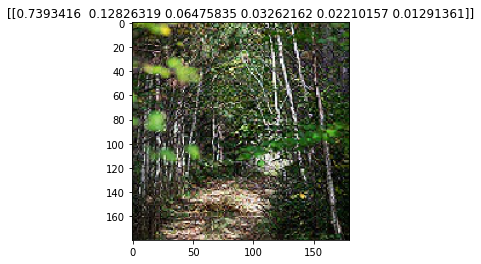

In [22]:
predict('/content/drive/MyDrive/CMPE258-HW6/seg_pred/seg_pred/172.jpg')

# Pytorch Build an CNN based image classifier

In [23]:
# install pytorch lighting
! pip install pytorch-lightning --quiet
# install weights and biases
!pip install wandb --quiet

     |████████████████████████████████| 808kB 8.9MB/s 
     |████████████████████████████████| 645kB 18.6MB/s 
     |████████████████████████████████| 829kB 33.3MB/s 
     |████████████████████████████████| 112kB 52.0MB/s 
     |████████████████████████████████| 276kB 56.7MB/s 
     |████████████████████████████████| 1.3MB 51.9MB/s 
     |████████████████████████████████| 296kB 52.6MB/s 
     |████████████████████████████████| 143kB 55.2MB/s 
     |████████████████████████████████| 1.8MB 9.4MB/s 
     |████████████████████████████████| 133kB 48.6MB/s 
     |████████████████████████████████| 102kB 11.5MB/s 
     |████████████████████████████████| 163kB 50.2MB/s 
     |████████████████████████████████| 71kB 10.6MB/s 


In [24]:
# regular imports
import os
import re
import numpy as np

# pytorch related imports

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import CIFAR10
from torchvision import transforms

# lightning related imports
import pytorch_lightning as pl
from pytorch_lightning.metrics.functional import accuracy
from pytorch_lightning.callbacks import Callback
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint

# sklearn related imports
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

In [25]:
import pytorch_lightning as pl
# your favorite machine learning tracking tool
from pytorch_lightning.loggers import WandbLogger
# import wandb and login
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [27]:
class CIFAR10DataModule(pl.LightningDataModule):
    def __init__(self, batch_size, data_dir: str = './'):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size

        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
        
        self.dims = (3, 32, 32)
        self.num_classes = 10
    def prepare_data(self):
        # download 
        CIFAR10(self.data_dir, train=True, download=True)
        CIFAR10(self.data_dir, train=False, download=True)
    def setup(self, stage=None):
        # Assign train/val datasets for use in dataloaders
        if stage == 'fit' or stage is None:
            cifar_full = CIFAR10(self.data_dir, train=True, transform=self.transform)
            self.cifar_train, self.cifar_val = random_split(cifar_full, [45000, 5000])

        # Assign test dataset for use in dataloader(s)
        if stage == 'test' or stage is None:
            self.cifar_test = CIFAR10(self.data_dir, train=False, transform=self.transform)
    def train_dataloader(self):
        return DataLoader(self.cifar_train, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.cifar_val, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.cifar_test, batch_size=self.batch_size)

# Callbacks & Earlystopping

In [28]:
from pytorch_lightning.callbacks import Callback

class ImagePredictionLogger(Callback):
    def __init__(self, val_samples, num_samples=32):
        super().__init__()
        self.num_samples = num_samples
        self.val_imgs, self.val_labels = val_samples
        
    def on_validation_epoch_end(self, trainer, pl_module):
        # Bring the tensors to CPU
        val_imgs = self.val_imgs.to(device=pl_module.device)
        val_labels = self.val_labels.to(device=pl_module.device)
        # Get model prediction
        logits = pl_module(val_imgs)
        preds = torch.argmax(logits, -1)
        # Log the images as wandb Image
        trainer.logger.experiment.log({
            "examples":[wandb.Image(x, caption=f"Pred:{pred}, Label:{y}") 
                           for x, pred, y in zip(val_imgs[:self.num_samples], 
                                                 preds[:self.num_samples], 
                                                 val_labels[:self.num_samples])]
            })

In [29]:
early_stop_callback = EarlyStopping(
   monitor='val_loss',
   patience=3,
   verbose=False,
   mode='min'
)

In [30]:
class LitModel(pl.LightningModule):
    def __init__(self, input_shape, num_classes, learning_rate=2e-4):
        super().__init__()
        
        # log hyperparameters
        self.save_hyperparameters()
        self.learning_rate = learning_rate
        
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 32, 3, 1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1)
        self.conv4 = nn.Conv2d(64, 64, 3, 1)

        self.pool1 = torch.nn.MaxPool2d(2)
        self.pool2 = torch.nn.MaxPool2d(2)
        
        n_sizes = self._get_conv_output(input_shape)

        self.fc1 = nn.Linear(n_sizes, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, num_classes)

    # returns the size of the output tensor going into Linear layer from the conv block.
    def _get_conv_output(self, shape):
        batch_size = 1
        input = torch.autograd.Variable(torch.rand(batch_size, *shape))

        output_feat = self._forward_features(input) 
        n_size = output_feat.data.view(batch_size, -1).size(1)
        return n_size
        
    # returns the feature tensor from the conv block
    def _forward_features(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool2(F.relu(self.conv4(x)))
        return x
    
    # will be used during inference
    def forward(self, x):
       x = self._forward_features(x)
       x = x.view(x.size(0), -1)
       x = F.relu(self.fc1(x))
       x = F.relu(self.fc2(x))
       x = F.log_softmax(self.fc3(x), dim=1)
       
       return x

    # logic for a single training step
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        
        # training metrics
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, logger=True)
        self.log('train_acc', acc, on_step=True, on_epoch=True, logger=True)
        
        return loss

    # logic for a single validation step
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)

        # validation metrics
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, y)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return loss

    # logic for a single testing step
    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        
        # validation metrics
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, y)
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

In [31]:

# Init our data pipeline
dm = CIFAR10DataModule(batch_size=32)
# To access the x_dataloader we need to call prepare_data and setup.
dm.prepare_data()
dm.setup()



Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


# Train and Evaluate The Model

In [32]:
from torchvision import transforms
# Init our data pipeline
dm = CIFAR10DataModule(batch_size=32)
# To access the x_dataloader we need to call prepare_data and setup.
dm.prepare_data()
dm.setup()

# Samples required by the custom ImagePredictionLogger callback to log image predictions.
val_samples = next(iter(dm.val_dataloader()))
val_imgs, val_labels = val_samples[0], val_samples[1]
val_imgs.shape, val_labels.shape

Files already downloaded and verified
Files already downloaded and verified


(torch.Size([32, 3, 32, 32]), torch.Size([32]))

In [33]:
MODEL_CKPT_PATH = 'model/'
MODEL_CKPT = 'model/model-{epoch:02d}-{val_loss:.2f}'

checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    filename=MODEL_CKPT,
    save_top_k=3,
    mode='min')

In [37]:
# Init our model
model = LitModel(dm.size(), dm.num_classes)

# Initialize wandb logger
wandb_logger = WandbLogger(project='wandb-lightning', job_type='train')

# Initialize a trainer
trainer = pl.Trainer(max_epochs=50,
                     progress_bar_refresh_rate=20, 
                     gpus=1, 
                     logger=wandb_logger,
                     callbacks=[early_stop_callback,
                                ImagePredictionLogger(val_samples)],
                     checkpoint_callback=checkpoint_callback)

# Train the model ⚡🚅⚡
trainer.fit(model, dm)

# Evaluate the model on the held-out test set ⚡⚡
trainer.test()

# Close wandb run
wandb.finish()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | conv1 | Conv2d    | 896   
1 | conv2 | Conv2d    | 9.2 K 
2 | conv3 | Conv2d    | 18.5 K
3 | conv4 | Conv2d    | 36.9 K
4 | pool1 | MaxPool2d | 0     
5 | pool2 | MaxPool2d | 0     
6 | fc1   | Linear    | 819 K 
7 | fc2   | Linear    | 65.7 K
8 | fc3   | Linear    | 1.3 K 
------------------------------------
952 K     Trainable params
0         Non-trainable params
952 K     Total params
3.809     Total estimated model params size (MB)


AttributeError: ignored

# c) EXTRA CREDIT : Transfer learning with keras and pytorch lightning  using pretrained models

Use state of art pretrained model  (supervised and unsupervised models) for classification (one supervised pretrained model (like imagenet based from tfhub) and one unsupervised pretrained model - like CLIP)

# Transfer Learning  with PyTorch Lightning

In [35]:
%%capture
# Install pytorch lighting
!pip install pytorch-lightning --quiet
# Install weights and biases
!pip install wandb --quiet
# Install patool to unrar dataset file
!pip install patool

In [ ]:
# regular imports
import os
import re
import numpy as np
import patoolib

# pytorch related imports 
import torch
from torch import nn
from torch.nn import functional as F
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision.datasets.utils import download_url

# lightning related imports
import pytorch_lightning as pl
from pytorch_lightning.metrics.functional import accuracy
from pytorch_lightning.callbacks import Callback
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint

# sklearn related imports
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# import wandb and login
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Using DataModules - Clatech101DataModule
DataModules are a way of decoupling data-related hooks from the LightningModule so you can develop dataset agnostic models.

In [ ]:
class Caltech101DataModule(pl.LightningDataModule):
    def __init__(self, batch_size, data_dir: str = './'):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size

        # Augmentation policy
        self.augmentation = transforms.Compose([
              transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
              transforms.RandomRotation(degrees=15),
              transforms.RandomHorizontalFlip(),
              transforms.CenterCrop(size=224),
              transforms.ToTensor(),
              transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
        ])
        self.transform = transforms.Compose([
              transforms.Resize(size=256),
              transforms.CenterCrop(size=224),
              transforms.ToTensor(),
              transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
        ])
        
        self.num_classes = 102

    def prepare_data(self):
        # source: https://figshare.com/articles/dataset/Caltech101_Image_Dataset/7007090
        url = 'https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/12855005/Caltech101ImageDataset.rar'
        # download
        download_url(url, self.data_dir)
        # extract 
        patoolib.extract_archive("Caltech101ImageDataset.rar", outdir=self.data_dir)

    def setup(self, stage=None):
        # build dataset
        caltect_dataset = ImageFolder('Caltech101')
        # split dataset
        self.train, self.val, self.test = random_split(caltect_dataset, [6500, 1000, 1645])
        self.train.dataset.transform = self.augmentation
        self.val.dataset.transform = self.transform
        self.test.dataset.transform = self.transform
        
    def train_dataloader(self):
        return DataLoader(self.train, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test, batch_size=self.batch_size)

# Callbacks
* Earlystopping

In [ ]:
early_stop_callback = EarlyStopping(
   monitor='val_loss',
   patience=3,
   verbose=False,
   mode='min'
)

* Custom Callback - ImagePredictionLogger

In [ ]:
class ImagePredictionLogger(Callback):
    def __init__(self, val_samples, num_samples=32):
        super().__init__()
        self.num_samples = num_samples
        self.val_imgs, self.val_labels = val_samples
        
    def on_validation_epoch_end(self, trainer, pl_module):
        val_imgs = self.val_imgs.to(device=pl_module.device)
        val_labels = self.val_labels.to(device=pl_module.device)
       
        logits = pl_module(val_imgs)
        preds = torch.argmax(logits, -1)
        
        trainer.logger.experiment.log({
            "examples":[wandb.Image(x, caption=f"Pred:{pred}, Label:{y}") 
                           for x, pred, y in zip(val_imgs[:self.num_samples], 
                                                 preds[:self.num_samples], 
                                                 val_labels[:self.num_samples])]
            })

* Model Checkpoint Callback

In [ ]:
MODEL_CKPT_PATH = 'model/'
MODEL_CKPT = 'model/model-{epoch:02d}-{val_loss:.2f}'

checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    filename=MODEL_CKPT,
    save_top_k=3,
    mode='min')

# Define The Model

In [ ]:
class LitModel(pl.LightningModule):
    def __init__(self, input_shape, num_classes, learning_rate=2e-4):
        super().__init__()
        
        # log hyperparameters
        self.save_hyperparameters()
        self.learning_rate = learning_rate
        self.dim = input_shape
        self.num_classes = num_classes
        
        self.feature_extractor = models.resnet18(pretrained=True)
        self.feature_extractor.eval()

        for param in self.feature_extractor.parameters():
            param.requires_grad = False
        
        n_sizes = self._get_conv_output(input_shape)

        self.classifier = nn.Linear(n_sizes, num_classes)

    # returns the size of the output tensor going into Linear layer from the conv block.
    def _get_conv_output(self, shape):
        batch_size = 1
        input = torch.autograd.Variable(torch.rand(batch_size, *shape))

        output_feat = self._forward_features(input) 
        n_size = output_feat.data.view(batch_size, -1).size(1)
        return n_size
        
    # returns the feature tensor from the conv block
    def _forward_features(self, x):
        x = self.feature_extractor(x)
        return x
    
    # will be used during inference
    def forward(self, x):
       x = self._forward_features(x)
       x = x.view(x.size(0), -1)
       x = F.log_softmax(self.classifier(x), dim=1)
       
       return x

    # logic for a single training step
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        
        # training metrics
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, logger=True)
        self.log('train_acc', acc, on_step=True, on_epoch=True, logger=True)
        
        return loss

    # logic for a single validation step
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)

        # validation metrics
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, y)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return loss

    # logic for a single testing step
    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        
        # validation metrics
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, y)
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

# Train and Evaluate The Model

In [ ]:
# Init our data pipeline
dm = Caltech101DataModule(batch_size=64)
# To access the x_dataloader we need to call prepare_data and setup.
dm.prepare_data()
dm.setup()

# Samples required by the custom ImagePredictionLogger callback to log image predictions.
val_samples = next(iter(dm.val_dataloader()))
val_imgs, val_labels = val_samples[0], val_samples[1]
val_imgs.shape, val_labels.shape


patool: Extracting Caltech101ImageDataset.rar ...
patool: running /usr/bin/unrar x -- /content/Caltech101ImageDataset.rar
patool:     with cwd='./'
patool: ... Caltech101ImageDataset.rar extracted to `./'.


(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [ ]:
# Init our model
model = LitModel((3,224,224), 102)

# Initialize wandb logger
wandb_logger = WandbLogger(project='wandb-lightning', job_type='train')

# Initialize a trainer
trainer = pl.Trainer(max_epochs=50,
                     progress_bar_refresh_rate=20, 
                     gpus=1, 
                     logger=wandb_logger,
                     callbacks=[early_stop_callback,
                                ImagePredictionLogger(val_samples, 64)],
                     checkpoint_callback=checkpoint_callback)

# Train the model ⚡🚅⚡
trainer.fit(model, dm)

# Evaluate the model on the held out test set ⚡⚡
trainer.test()

# Close wandb run
wandb.finish()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
wandb: Currently logged in as: tripuragorla (use `wandb login --relogin` to force relogin)



  | Name              | Type   | Params
---------------------------------------------
0 | feature_extractor | ResNet | 11.7 M
1 | classifier        | Linear | 102 K 
---------------------------------------------
102 K     Trainable params
11.7 M    Non-trainable params
11.8 M    Total params
47.166    Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': 0.8759878277778625, 'test_loss': 0.42639362812042236}
--------------------------------------------------------------------------------


_runtime,566
_timestamp,1619992076
_step,71
train_loss_step,0.15241
train_acc_step,0.9375
epoch,13
trainer/global_step,1428
train_loss_epoch,0.13194
train_acc_epoch,0.97354
val_loss,0.41527
val_acc,0.881


_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_loss_step,█▆▄▄▃▃▂▃▂▃▂▂▂▂▁▂▂▂▂▁▁▁▁▁▁▁▁▁
train_acc_step,▁▃▄▅▇▅▇▆▇▅▆▇▇▇▇▇▇▆▇▇█▇█▇█▇█▇
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_loss_epoch,█▃▂▂▂▂▁▁▁▁▁▁▁▁
train_acc_epoch,▁▆▇▇▇▇▇███████
val_loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁
val_acc,▁▅▆▇▇▇█████▇██
